IMDB movie review sentiment classification dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10000
)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 5, "?") for i in train_data[1]])

1641221/1641221 [==============================] - 0s 0us/step


**Encoding mutli-hot**





In [2]:
import numpy as np
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
  return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**partial training in model**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
[    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    x=partial_x_train,
    y=partial_y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_val, y_val)
    )

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.4501 - accuracy: 0.7968 - val_loss: 0.3796 - val_accuracy: 0.8344
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2280 - accuracy: 0.9116 - val_loss: 0.2736 - val_accuracy: 0.8900
Epoch 3/20
30/30 [==============================] - 2s 71ms/step - loss: 0.1751 - accuracy: 0.9335 - val_loss: 0.2905 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1245 - accuracy: 0.9558 - val_loss: 0.5457 - val_accuracy: 0.8282
Epoch 5/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1028 - accuracy: 0.9609 - val_loss: 0.3766 - val_accuracy: 0.8783
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 0.0911 - accuracy: 0.9661 - val_loss: 0.4192 - val_accuracy: 0.8739
Epoch 7/20
30/30 [==============================] - 2s 60ms/step - loss: 0.0758 - accuracy: 0.9745 - val_loss: 0.5277 - val_accuracy: 0.8618
Epoch 8/20
30

**Training and validations loss values**


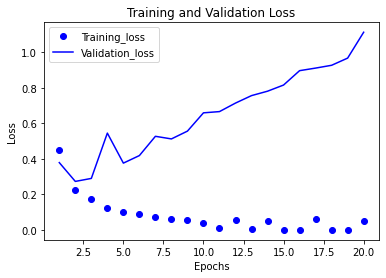

In [4]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training_loss")
plt.plot(epochs, val_loss_values, "b", label="Validation_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Trainig and Validation Accuracy**

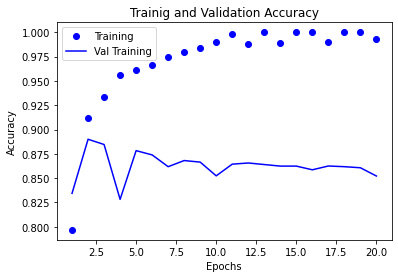

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [5]:
plt.clf()
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training")
plt.plot(epochs, val_acc, "b", label="Val Training")
plt.title("Trainig and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(history_dict.keys())

**Main trainin in model**

In [6]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 28ms/step - loss: 0.1363 - accuracy: 0.8298
Epoch 2/3
49/49 [==============================] - 1s 28ms/step - loss: 0.0695 - accuracy: 0.9160
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1128 - accuracy: 0.8484


In [7]:
predict = model.predict(x_test)
print(results)

782/782 [==============================] - 2s 2ms/step
[0.11275991052389145, 0.8484399914741516]
